# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

## What is Scikit-Learn?

[Scikit-Learn](https://scikit-learn.org/stable/index.html), also referred to as `sklearn`, is an open-source, commercially usable Python machine learning library. Built on NumPy, SciPy, and Matplotlib, It provides simple, efficient tools that are accessible to everybody, and reusable in various contexts.

![Scikit-Learn is used for modeling in machine learning projects.](./img/sklearn_6-step_ml_framework_tools_scikit-learn_highlight.png)

## What we're going to cover

This notebook shall be focusing on the main use cases of the Scikit-Learn library. More specifically, we shall go through the typical workflow of a Scikit-Learn project in a step-by-step process and improving upon our knowledge of Scikit-Learn as we go through the steps.

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choosing the right estimator/algorithm for our problems
3. Fitting the model/algorithm and using it to make predictions on our data
4. Evaluating the model
5. Improving the model
6. Saving and loading a trained model
7. Putting it all together

**Note:** All of the steps in this notebook shall focus on **supervised learning** (having data and labels).

## 0. An end-to-end Scikit-Learn workflow

Scikit-Learn is a vast library containing a large variety of tools that can be used in various different contexts. As such, it might be better to start off with a typical end-to-end Scikit-Learn workflow and take a look at the most common use-cases of the library. 

[This notebook](./scikit-learn_workflow.ipynb) demonstrates one such typical Scikit-Learn workflow.

From there, we shall take a much closer look at each step in the process and improve upon the knoledge we gained using Scikit-Learn.

![Diagram of the Scikit-Learn workflow](img/sklearn_workflow.png)

## 1. Getting the data ready

### Standard imports

The very first step when working with a machine learning project is to import the necessary libraries and packages you'll be working with.

For this project, we shall keep using the usual Numpy, Pandas, and Matplotlib packages, so let's go ahead and import those right away:

In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Now that we've imported the usual packages, let's get some data to work with.

Let's take a look at some heart disease data:

In [2]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The three main things we have to do are:

- Split the data into features (usually called `X`) and labels (usually called `y`)
- Converting non-numeric values into numeric values (also called *feature encoding*)
- Filling (aka *imputing*) or disregarding missing values in the data

### Splitting the data

In [3]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Now that we've split the data into features and labels, we also have to split them further into *training* and *test sets* that we can use to train and validate the machine learning models we're going to be making.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Excellent! we now have training and test sets for our heart disease data.

When we take a look at the shapes of the training and test shapes, notice we seem to get tuples corresponding to the dimensions of the data. The second number in the tuples simply means that `X` has `13` columns of data, while `y` has only one column. But what about the `242` and `61`?

Let's take a look at the shape of our original data:

In [6]:
X.shape, y.shape

((303, 13), (303,))

In [7]:
len(heart_disease)

303

It looks like the original heart disease data has `303` rows.

When we did the `train_test_split()` call, notice we had a `test_size` parameter set to `0.2`.

This means 20% of the data rows shoud be allocated for the test set. Let's verify:

In [8]:
round(303 * 0.2)

61

In [9]:
303 - 61

242

Looks like it checks out. 242 rows were allocated for the training set while 61 rows were allocated for the test set.

### Converting data into numeric values

Luckily, the heart disease data provided to us is already in numeric form on all columns.

However, most other datasets might not have all their data in numerical form.

It is important to convert the non-numeric data into numerical form first, because most machine learning models only work on numeric inputs.

Let's take a look at another example dataset and see how we can convert these kinds of data.

In [10]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [11]:
len(car_sales)

1000

In [12]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

As you can see, the `Make` and `Colour` columns have non-numeric data.

Let's see what happens if we try and build a model on the dataset without first converting those columns.

In [13]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

np.random.seed(69)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Try to predict with random forest on price column (doesn't work)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

Oh dear, looks like Scikit-Learn throws an error when we try and build a model this time.

The error message gives us a hint as to what went wrong:
> ValueError: could not convert string to float: 'Toyota'

This means the `RandomForestRegressor()` model only accepts numeric inputs. Otherwise, it throws an error when it tries to deal with non-numeric data.

Now, let's see how to get around that error by converting the non-numeric data into a numeric format that the model can work with.

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

The `categorical_features` list contains the columns that have non-numeric or *categorical* data

Now, we're trying to convert the `Make` and `Colour` columns into a numeric format, but why is `Doors` also included in the list?

Let's take a look at the `Doors` column first:

In [16]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

The `Doors` column indeed contains numerical data, but at the same time it also has very few distinct values with little variance.

Thus, it can also make sense to treat those discrete values as different *categories* that the data can fall into.

In [17]:
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

Now that's quite a lot to take in. Let's try and convert it into a Pandas `DataFrame` so we can have an easier time reading the data:

In [18]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


Now, you might say: "Hold on, this doesn't look the same as the original data!", but let's take a step back and look at what's actually happened here.

For reference, here's the dataset we're working with:

In [19]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


Hmmm... It looks like we do have the same values on the `Odometer (KM)` column in the `teansformed_X` dataset.

Still, what's the deal with all the other columns?

The new columns are a result of the `OneHotEncoder` transforming the catergorical data into multiple categories.

It does this by generating additional columns to represent each distinct category for the data.

For example, `OneHotEncoder` generated four columns to represent each of the car makes (`BMW`, `Honda`, `Nissan`, and `Toyota`). Each of those columns will then have a value of `0.0` if the car doesn't have the corresponding car make, or `1.0` if the car does have the corresponding car make. Note that only one column out of those four will have a `1.0` value, and the rest should have a value of `0.0`.

`OneHotEncoder` also does the same thing for the other `categorical_features` in the dataset.

#### Another way to encode categorical data

We can also use the `get_dummies()` function from the Pandas library to convert categorical data into numeric form.

Let's take a look at the original `car_sales` dataset:

In [20]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [21]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


We see that the `Make` and `Colour` columns were split into different categories, but the `Doors` column was still left intact.

Again, since the `Doors` column is already numeric, we can leave it as-is, but if we want to treat it as a categorical data, we can convert it into an `object` type for the `get_dummies()` function to split it into categories:

In [22]:
car_sales["Doors"] = car_sales["Doors"].astype(object)
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


Great! Now that we've successfully transformed the data into numeric form, we can try and fit a model on our transformed dataset.

In [23]:
np.random.seed(69)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.31695249778476753

Fantastic! Looks like we've successfully fitted a model to the data without getting an error this time, all thanks to transforming our data into numeric form.

### Dealing with missing values

There are two ways to deal with missing data.

- Fill in the missing parts with a predetermined value. This approach is also known as **_imputation_**.
- Remove the rows cotaining missing data altogether. Note that this results in having less data to work with.

**Note:** Dealing with missing values is a problem to problem issue. And there's often no best way to do it.

In [24]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


We can see some odd bits on `NaN` values in this dataset.

One way to quickly check exactly how much missing data is in your dataset is to use the `isna()` method from Pandas:

In [25]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

As you can see, we have quite a lot of missing fields in our dataset.

What happens if we try and fit a model on a dataset with missing data?

In [26]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [27]:
# Transform categorical data into numeric form
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

# Try and fit a model
np.random.seed(69)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

We get another error this time:
> ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

This means Scikit-Learn also needs the data to contain no missing values.

Let's see how we can deal with these missing data before we try and fit a model on this dataset.

#### Option 1: Use Pandas to deal with missing data

We can use Pandas to fill in the missing values of the dataset.

For numerical values we can simply use the mean of the existing data in the column, and for categorical data we can use some other predetermined value instead.

In [28]:
car_sales_missing["Make"].fillna("Missing", inplace=True)
car_sales_missing["Colour"].fillna("Missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,Missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [29]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

Notice that the `Price` column still has missing values.

Since `Price` is the value we're trying to predict, it might be better to just remove the rows with no `Price` value for now:

In [30]:
car_sales_missing.dropna(inplace=True)

In [31]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

We now have no missing values in our data, but it came at a cost of having to remove a number of rows that had no `Price` value.

In [32]:
len(car_sales_missing)

950

Now let's try fitting a model into this dataset:

In [33]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [34]:
# Transform categorical data into numeric form
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

# Try and fit a model
np.random.seed(69)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.25296341556528734

#### Option 2: Use Scikit-Learn to deal with missing data

We can also use Scikit-Learn to deal with missing data.

Let's use the `car_sales_missing` dataset once again, this time using Scikit-Learn to fill in or remove rows with missing data.

In [35]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Once again, we can drop the rows with the missing `Price` values for now.

In [36]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

Let's also split the remaining data into training and test sets:

In [37]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(69)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now, let's fill in the missing data using Scikit-Learn.

Note that it is best practice to use the following Scikit-Learn functions to fill and transform missing data separately on the training and test sets.

Why is that? It is because performing imputation on the whole un-split dataset is causing "information leakage", which is when information contained in the test set is "leaked" into the training data set. The result is a biased estimator with an optimistic test error. The test set should be set aside at the beginning of any machine learning project and only be touched when validating the model.

Here are some guidelines to keep in mind when handling missing data:
- Split your data first (into train/test), always keep your training & test data separate
- Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)
- Don't use data from the future (test set) to fill data from the past (training set)

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Use SimpleImputer to fill in missing values
cat_imputer = SimpleImputer(strategy="constant", fill_value="Missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

Now that we have an imputer set up, it's time to use it to actually fill in the missing values in the dataset.

> **Note:** We use `fit_transform()` on the training data and `transform()` on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [39]:
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

filled_X_train

array([['BMW', 'White', 5.0, 152410.0],
       ['Nissan', 'Green', 4.0, 87701.0],
       ['Nissan', 'White', 4.0, 51004.0],
       ...,
       ['Honda', 'White', 4.0, 40134.0],
       ['Nissan', 'Black', 4.0, 125251.0],
       ['Missing', 'White', 4.0, 109384.0]], dtype=object)

Let's view the result as a Pandas `DataFrame` to get a better look at what just happened:

In [40]:
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test,
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_train

,Make,Colour,Doors,Odometer (KM)
0,BMW,White,5.0,152410.0
1,Nissan,Green,4.0,87701.0
2,Nissan,White,4.0,51004.0
3,Honda,Blue,4.0,30120.0
4,Toyota,Blue,4.0,132327.821823
...,...,...,...,...
755,Honda,White,4.0,193179.0
756,Honda,Blue,4.0,196507.0
757,Honda,White,4.0,40134.0
758,Nissan,Black,4.0,125251.0


In [41]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

Wonderful! We've just used Scikit-Learn to fill in the missing values.

Now, there's just one more step before we can fit a model to this dataset.

Let's revisit a previous topic and convert the categorical features into a numeric form.

In [42]:
# One-hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train

<760x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [43]:
pd.DataFrame(transformed_X_train.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,152410.000000
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87701.000000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,51004.000000
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30120.000000
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,132327.821823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,193179.000000
756,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,196507.000000
757,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,40134.000000
758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,125251.000000


Now that we've done all the necessary steps to get our data ready, let's see if we can fit a machine learning model this time.

In [44]:
np.random.seed(69)
model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.2603174739059788

Great work! We've successfully prepared our dataset by splitting into training and test sets, handling missing data, and converting categorical features into a numerical form. That means we are now able to use these steps to transform any other dataset in order to better fit machine learning models.

If this looks confusing, don't worry, we've covered a lot of ground very quickly. And we'll revisit these strategies in a future section in way which makes a lot more sense.

For now, the key takeaways to remember are:

- Most datasets you come across won't be in a form ready to immediately start using them with machine learning models. And some may take more preparation than others to get ready to use.
- For most machine learning models, your data has to be numerical. This will involve converting whatever you're working with into numbers. This process is often referred to as **feature engineering** or **feature encoding**.
- Some machine learning models aren't compatible with missing data. The process of filling missing data is referred to as **data imputation**.

## 2. Choosing the right estimator/algorithm for our problems

In order to get the right predictions for our data, it is important that we choose the right machine learning model that can best fit our data.

So far we've been using the `RandomForestRegressor` model provided by Scikit-Learn. But how did we know that it's the right model to use for our dataset? When does it make sense to use that particular model, and when does it make more sense to choose another model to fit?

First, we must ask ourselves what kind of machine learning problem are we trying to solve.

Here are some common types of machine learning problems:
- **Classification** - predicting whether a sample is one thing or another (i.e. whether a patient has heart disease)
   > Sometimes you'll see `clf` (short for classifier) used as a classification estimator instance's variable name.
- **Regression** - predicting a number (i.e. selling price of a car)
- **Clustering** - discovering groups in data (i.e. identifying different cutomer segments)
- **Dimensionality Reduction** - reducing the number of features in a given dataset (select only the important ones)

Scikit-Learn also provides [a handy cheat-sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) to help us identify the machine learning problem, as well as some options for machine learning models to use on our given datasets:

![Scikit-Learn algorithm cheat-sheet](./img/sklearn_ml_map.png)

> **Note:** Scikit-Learn uses *estimator* as another term for machine learning *model* or *algorithm*.

### Picking a machine learning model for a regression problem

Let's start with a regression problem. We'll use the [California housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) built into Scikit-Learn's `datasets` module.

In [45]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing() # returns a HUGE dictionary

The `california` dataset is loaded as a Python dictionary, so let's turn it into a Pandas `DataFrame` to make it easier to work with.

In [46]:
california_df = pd.DataFrame(california["data"], columns=california["feature_names"])
california_df["target"] = pd.Series(california["target"])
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


That's quite a lot of data. Let's see exactly how many samples are we working with.

In [47]:
len(california_df)

20640

Great! Now let's try using that cheat-sheet and pick a machine learning model for the dataset.

![Using the Scikit-Learn cheatsheet to choose a model for the Boston housing dataset](./img/sklearn-ml-map-cheatsheet-california-housing-ridge.png)

Following the flowchart we see that Scikit-Learn suggests using a [`Ridge`](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) regression model. Let's try it out:

In [48]:
from sklearn.linear_model import Ridge

np.random.seed(69)

X = california_df.drop("target", axis=1)
y = california_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6060537241737072

Not bad. But let's see if we can still get an even better result.

What happens if the `Ridge` regressor did not work, or did not produce as good of a score as we wanted?

Let's check back on the cheat-sheet to see if we can prceed with an alternative step:

![Trying out the Ensemble regressors in case the Ridge regressor did not achieve the result we wanted](./img/sklearn-ml-map-cheatsheet-california-housing-ensemble.png)

Following the diagram, we see that the next step would be to try out [`EnsembleRegressors`](https://scikit-learn.org/stable/modules/ensemble.html).

One of the most common and useful ensemble methods is the [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest), known for its fast training and prediction times and adaptability to different problems.

We've actually used the `RandomForestRegressor` model earlier in this notebook, and here we see why we chose this particular model in those earlier datasets.

The basic premise of the Random Forest is to combine a number of different decision trees, each one random from the other and make a prediction on a sample by averaging the result of each decision tree.

An in-depth discussion of the Random Forest algorithm is beyond the scope of this notebook but if you're interested in learning more, [An Implementation and Explanation of the Random Forest](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) in Python by Will Koehrsen is a great read.

Let's try using the [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) on the Boston dataset:

In [49]:
np.random.seed(69)

X = california_df.drop("target", axis=1)
y = california_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8081169165695959

Wonderful! We see that we get a much better score using the `RandomForestRegressor`.

### Picking a machine learning model for a classification problem

Now let's try another type of machine learning problem. This time let's work through the steps of picking a model for a classification problem.

The heart disease dataset from earlier contains data for exactly that kind of problem, so let's take another look at that here:

In [50]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Again, let's check how many samples we're dealing with:

In [51]:
len(heart_disease)

303

Now let's work through the cheat-sheet yet again to try and find the right model for our heart disease dataset.

![Using the Scikit-Learn cheat-sheet to find the right model for the heart disease dataset](./img/sklearn-ml-map-cheatsheet-heart-disease-linear-svc.png)

Following the diagram, we see that we are recommended to use the [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) model. `LinearSVC` stands for Linear Support Vector Classifier.

Let's try it on our data:

In [52]:
from sklearn.svm import LinearSVC

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

d:\git-gud\ztm-machine-learning\env\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8360655737704918

Looks good, but we see that we get some warning that tells us that the model fails to converge on a final result.

We can try and tweak some settings to try and fix those issues, but let's get to that another time.

For now, let's proceed along the cheat-sheet and choose another classifier model.

![Picking another classifier model from the cheat-sheet](./img/sklearn-ml-map-cheatsheet-heart-disease-ensemble.png)

We see that we get to the `EnsembleMethods` again. Except this time, we're going to be using ensemble *classifiers* instead of *regressors*.

The Random Forest model has another variant that is used for classification problems. Let's try using it on the heart disease data:

In [53]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

Good job! We see that we got no warnings this time using the `RandomForestClassifier`, and we also got a better score to boot.

Again, we can tweak some settings or *hyperparameters* in the models above to try and improve their results, and we'll take a look at that more closely in later sections.

To wrap things up for this section, here's some quick guideleined for choosing machine learning models:
- If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.
- If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.

For this notebook, we're focused on structured data, which is why the Random Forest has been our model of choice.

If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources:

- [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
- [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

The beautiful part about using Scikit-Learn is that its API allows us to use different models with pretty much the exact same workflows. Indeed, we see that our code has stayed pretty much the same across the different machine learning models used in this section. A big part of being a machine learning engineer or data scientist is experimenting - you might want to try out some of the other models on the cheat-sheet and see how you go. The more you can reduce the time between experiments, the better.

## 3. Fitting the model/algorithm and using it to make predictions on our data

Now that we have chosen a model for our data, it's time to have the model learn about our data so it can be used to make predictions.

We've actually encountered some examples of this in the earlier sections, when we were fitting the model to the sample datasets:

In [54]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

Now, what is the `fit()` method actually doing when we call it on our data?

When we call the `fit()` method, the machine learning algorithm attempt to find patterns between `X` and/or `y`.

Let's take a look at our `X` and `y` data:

In [55]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2


In [56]:
y_train.head()

77     1
117    1
124    1
237    0
122    1
Name: target, dtype: int64

When we call `fit(X, y)`, the model takes a look at all the examples in `X` (features) and sees what the corresponding `y` (label) is.

Each different model looks at the data differently, but for now you can imagine it being similar to how people notice patterns in data over time.

You'd look at the feature variables, X, the age, sex, chol (cholesterol) and see what different values led to the labels, y, 1 for heart disease, 0 for not heart disease.

This concept, regardless of the problem, is similar throughout all of machine learning.

**During training (finding patterns in data):**

A machine learning algorithm looks at a dataset, finds patterns, tries to use those patterns to predict something and corrects itself as best it can with the available data and labels. It stores these patterns for later use.

**During testing or in production (using learned patterns):**

A machine learning algorithm uses the patterns its previously learned in a dataset to make a prediction on some unseen data.

### Making predictions using a machine learning model

After fitting the model to the data (aka training the machine learning model), we'll want to use it to make predictions.

Scikit-Learn offers several ways to make predictions, the most common of which being `predict()` and `predict_proba()`.

Let's see how they work:

In [57]:
clf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

Given data in the form of `X`, the `predict()` function returns labels in the form of `y`.

It's standard practice to save these predictions to a variable named something like `y_preds` for later comparison to `y_test` or `y_true` (usually same as `y_test` just another name):

In [58]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

Now, where have we seen that kind of result before?

That's right, the `accuracy_score()` and `clf.score()` functions make these comparisons in the same way:

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [60]:
clf.score(X_test, y_test)

0.8524590163934426

So far we've been dealing with the `predict()` function. The `predict()` function returns values in the same format as the labels in `y`.

If you would instead like to get the *probabilities* of getting a label based on the given data, you can instead use `predict_proba()`:

In [61]:
clf.predict_proba(X_test.head())

array([[0.9 , 0.1 ],
       [0.99, 0.01],
       [0.73, 0.27],
       [0.93, 0.07],
       [0.01, 0.99]])

In contrast, here's what `predict()` would've returned:

In [62]:
clf.predict(X_test.head())

array([0, 0, 0, 0, 1], dtype=int64)

As you can see, `predict_proba()` returns an array of values for each row of the input rather than just one single number per row like `predict()` does.

The array of values returned by `predict_proba()` are actualy the *probabilities* of getting a certain label (in our case either `0` or `1`) given an input sample.

In [63]:
clf.predict_proba(X_test[:1])

array([[0.9, 0.1]])

This particular output means that for the sample `X_test[:1]`, the model predicts that the sample will have a label `0` with a probability score of `0.9`.

Conversely, this also means the sample would have a label `1` with probability score of `0.1`.

Given these two probabilities, which one do you think would we get if we used `predict()`?

In [64]:
clf.predict(X_test[:1])

array([0], dtype=int64)

We get a predicted label `0`.

Because our problem is a classification task, we could simply just get the one with the highest probability if we want a singular output label.

With our dataset only having two labels to choose from, predicting a label with 0.5 probability every time would be the same as a coin toss (guessing). Therefore, once the prediction probability of a sample passes 0.5 for a certain label, it's assigned that label.

### Predicting values for regression problems

`predict()` can also be used for regression problems:

In [65]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(69)

X = california_df.drop("target", axis=1)
y = california_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

For regression problems, we can validate our predictions using `mean_absolute_error()`:

In [66]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270582259932172

## 4. Evaluating the model

We've seen how to train a model to find patterns in data with `fit()`. We've also seen how to make predictions with the trined model using `predict()` and `predict_proba()`.

Now it's time to evaluate how trustworthy our model's predictions are.

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

1. The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The `scoring` parameter. This parameter can be passed to methods such as `cross_val_score()` or `GridSearchCV()` to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions. Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

Let's look at some examples.

### General model evaluation with `score()`

We've already seen a quick and easy way to evaluate a machine learning model.

Each model instance provided by Scikit-Learn comes with a `score()` method that we can use to generate a metric for how accurate the models predictions are compared to the actual test data labels.

Let's review the heart disease dataset:

In [67]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

Once we have a trained model, we can simply use the `score()` method and pass along the test data (meaning the data the model has never seen before) to evaluate the model.

In [68]:
clf.score(X_test, y_test)

0.8524590163934426

Note that the `score()` method may differ for different type of machine learning models.

For instance, a `RandomForestClassifier`'s `score()` method uses mean accuracy between the prediction vs the test label as its score method.

A model which predicts everything 100% correct would receive a score of 1.0 (or 100%).

Using the `score()` method, we can see that our model currently has a score of 0.8524, or 85.24%.

Let's try and `score()` a regression model:

In [69]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(69)

X = california_df.drop("target", axis=1)
y = california_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8081169165695959

Notice how we can call the `score()` method in pretty much the same way, but there's actually a subtle difference to how the `score()` method works behind the scenes.

A `RandomForestRegressor` model uses a different metric to score the model's accuracy. Specifically, the metric used for regression models is the coefficient of determination or [R^2 (pronounced R-squared)](https://en.wikipedia.org/wiki/Coefficient_of_determination).

### Evaluating a model using the `scoring` parameter

The `score()` method is one way to quickly asses the performance of a machine learning models, providing some default evaluation metric that can work across most types of machine learning models.

If you want to take a step up from using `score()`, Scikit-Learn also offers a variety of other methods for evaluating your machine learning model.

For instance, depending on the problem you're working on you might want to use a custom `scoring` parameter to help evaluate your model.

You can then use the custom scoring parameter with Scikit-Learn's [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Let's compare the difference between using `score()` and `cross_val_score()`:

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [71]:
# Using score()
clf.score(X_test, y_test)

0.8524590163934426

In [72]:
# Using cross_val_score()
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.78688525, 0.8       , 0.78333333])

Let's try and break down what's happened here.

You might notice that `cross_val_score()` returns an array of values instead of only a single number like `score()`.

This is because `cross_val_score` uses a parameter called `cv` which determines its cross-validation splitting strategy.

By default, `cv` uses a 5-fold cross-validation strategy.

Now what does all this mean?

This visual diagram might be able to help:

![Normal Train-Test Split vs 5-fold Cross-Validation](./img/sklearn_cross-validation.png)

Figure 1.0 represents the usual train-test split we're used to working with. By setting a `test_size` of `0.2` (or 20%), it means that we are training the model using 80% of the samples, while the remaining 20% are solely for validation and not used for the model to learn anything.

This also means depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset. For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly. The same goes for the reverse.

Figure 2.0 shows 5-fold cross-validation, a method which tries to provide a solution to:

1. Not training on all the data
2. Avoiding getting lucky scores on single splits of the data

Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times. On a different split each time, returning a score for each.

Why 5-fold?

The actual name of this setup K-fold cross-validation, Where K is an abitrary number. 5-fold cross-validation is simply the default used by `cross_val_score()` starting from Scikit-Learn version 0.22 onwards.

Figure 2.0 is what happens when we run the following:

In [73]:
cross_val_score(clf, X, y, cv=5) # cv is equivalent to K

array([0.80327869, 0.90163934, 0.80327869, 0.8       , 0.8       ])

By getting 5 different scores instead of 1, we can have a wider perspective when it comes to evaluating our model.

We can also simple take the mean of these 5 scores to get a singular result.

Let's compare the average `cross_val_score()` with our usual `score()`:

In [74]:
np.random.seed(69)

clf_single_score = clf.score(X_test, y_test)
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8249180327868852)

We can see that the mean score returned by `cross_val_score()` is slightly lower than the score returned by `score()`, but we can be much more confident on the accuracy of the cross-validated metric.

But wait, where is the `scoring` parameter we're supposed to be talking about?

By default, the `scoring` parameter is set to `None`, meaning we haven't actually used it yet.

In [75]:
cross_val_score(clf, X, y, scoring=None) # default scoring

array([0.83606557, 0.86885246, 0.80327869, 0.85      , 0.78333333])

When scoring is set to `None` (by default), it uses the same metric as `score()` for whatever model is passed to `cross_val_score()`.

In our case, we're using a `RandomForestClassifier` model which uses mean accuracy as the default `score()` metric.

You can change the evaluation score `cross_val_score()` uses by changing the `scoring` parameter.

For different problems using different kinds of models, you might have to use different evaluation scores.

The [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) outlines a vast range of evaluation metrics for different problems, but let's have a look at a few.

### Classification model evaluation metrics

Scikit-learn offers a variety of evaluation metrics for classification problems. Here are the most common metrics/methods you're most likely to come across:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Using the classification code from above, let's have a look at each of these:

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

#### Accuracy

Accuracy is the default metric for the `score()` function within each of Scikit-Learn's classifier models, and is the one we're already used to working with by now.

It's probably the metric you're most likely to see being used in classification problems, but there can be quite a few situations where other metrics might make more sense to use.

Scikit-Learn returns accuracy as a decimal, but you can easily convert it to a percentage:

In [77]:
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


#### Area Under Receiver Operating Characteristic (ROC) Curve

The length of its name might sound intimidating, but you'll also see this referred to as Area Under Curve (AUC).

In a nutshell, the Receiver Operating Characteristic (ROC) curve is a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:

- True positive = model predicts 1 when truth is 1
- False positive = model predicts 1 when truth is 0
- True negative = model predicts 0 when truth is 0
- False negative = model predicts 0 when truth is 1

Scikit-Learn lets you calculate the information required for a ROC curve using the [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function.

In [78]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep only the probabilities for positive predictions
y_probs_positive = y_probs[:, 1]

# Use roc_curve to calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate (fpr)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.03448276, 0.06896552, 0.06896552, 0.10344828, 0.10344828,
       0.13793103, 0.13793103, 0.17241379, 0.17241379, 0.31034483,
       0.34482759, 0.37931034, 0.44827586, 0.55172414, 0.62068966,
       0.65517241, 0.72413793, 0.79310345, 0.89655172, 1.        ])

Looking at these on their own doesn't make much sense. It's much easier to see their value visually.

Scikit-Learn doesn't have a built-in function to plot a ROC curve, but we can always make our own function to plot these kinds of values visually:

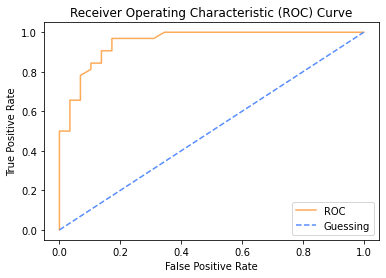

In [79]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="#fdab58", label="ROC")
    # Plot simple line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="#588dfd", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

The plot might seem a bit confusing looking at it for the first time, but we can infer that our model seems to be doing a far better job than guessing.

If you want to quantify how good your model is performing, you can use the Area Under Curve (AUC). Scikit-Learn implements a function to caculate this called [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).

The maximum ROC AUC score you can achieve is `1.0` and generally, the closer to `1.0`, the better the model.

In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9504310344827586

Having an `roc_auc_score` of `1.0` means your model only predicts true positives and no false positives, thus literally making perfect predictions.

Looking at this using the plotting function from earlier, the ROC curve would run along the top left corner of the plot.

You can see this by creating a ROC curve using only the `y_test` labels:

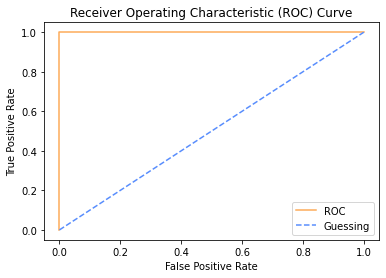

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [82]:
roc_auc_score(y_test, y_test)

1.0

An `roc_auc_score` of `1.0` is the most ideal score, but it is also unlikely.

In a nutshell, the main takeaways are:

- ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).
- The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.
- The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

Here are some great resources for learning more about ROC:

- [ROC and AUC, Clearly Explained!](https://www.youtube.com/watch?v=4jRBRDbJemM) by StatQuest
- [Scikit-Learn's ROC documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) (contains code examples)
- [How the ROC curve and AUC are calculated](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by Google's Machine Learning team

#### [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

Another metric commonly used for evaluating classification models is using a confusion matrix.

A confusion matrix is a specific table layout that allows visualization of the performance of an algorithm, each row representing the instances in an actual class while each column represents the instances in a predicted class, or vice versa. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

In [83]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 5, 27]], dtype=int64)

Again, this is probably easier visualized.

One way to do it is with `pd.crosstab()`:

In [84]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,25,4
1,5,27


An even more visual way is with Seaborn's [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) plot.

If you've never heard of Seaborn, it's a library which is built on top of Matplotlib. It contains a bunch of helpful plotting functions.

And if you haven't got Seaborn installed, you can install it into the current environment using:

```sh
# Install Seaborn in the current Jupyter Kernel/Conda environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn
```

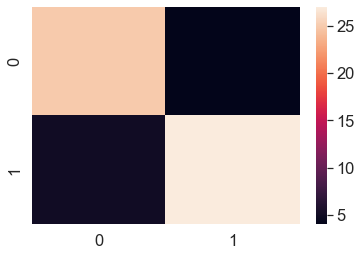

In [85]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

This plot could use some added communication to let viewers know exactly what's going on.

Let's add some customizations and make it into a reusable function: 

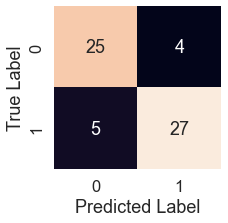

In [86]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's `heatmap()` function.
    """

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes
                     cbar=False) # Remove the color bar on the side
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label");

plot_conf_mat(conf_mat)

As with ROC curves before, an ideal model only has true positives and true negatives. This means the top right and bottom left squares in the confusion matrix would both have a value of 0.

Now, why did we name our function `plot_conf_mat()` instead of `plot_confusion_matrix()`?

Scikit-Learn has an implementation of plotting a confusion matrix called [`plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix), however, the documentation also says this function is deprecated.

As such, trying to import it might return an error.

You can try to use it but beware.

d:\git-gud\ztm-machine-learning\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


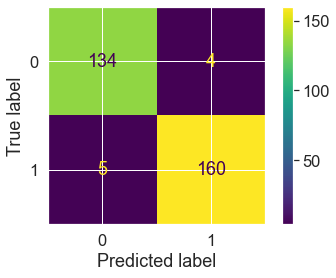

In [87]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

> _Deprecated since version 1.0:_ `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the following class methods: [`from_predictions`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) or [`from_estimator`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator).

Thankfully, Scikit-Learn recently released a new version 1.0, and its documentation also links us to other built-in methods we can use instead.

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) - this takes a fitted estimator (like our `clf` model), features (`X`) and labels (`y`), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.
2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

Let's take a quick look:

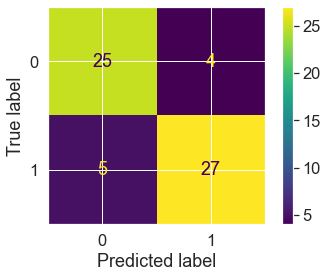

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

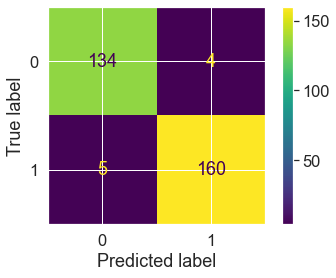

In [93]:
ConfusionMatrixDisplay.from_estimator(clf, X, y);

#### Classification report

The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

Let's see it in action:

In [90]:
from sklearn.metrics import classification_report

classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.85        29\n           1       0.87      0.84      0.86        32\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

The formatting looks a bit wonky, because we actually need to pass it to the `print()` function:

In [91]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61




It returns four columns: _precision_, _recall_, _f1-score_ and _support_.

The number of rows will depend on how many different classes there are. But there will always be three rows labelled _accuracy_, _macro avg_ and _weighted avg_.

Each term measures something slightly different:

- **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
Support - The number of samples each metric was calculated on.
- **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
- **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
- **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

You might be tempted to ask: Why should we bother with all these? Isn't measuring the model's accuracy enough?

Accuracy is a good metric to report, except when you have very imbalanced classes. Let's take a look at a basic example:

In [92]:
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   zero_division=0,
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


This example represents a heavily imbalanced situation where only one case is positive over a total of 10,000 cases.

You build a model, and find that it's 99.99% accurate... But all it really does is predict that no one has the disease, in other words all 10,000 predictions are false.

If what you need is for the model to successfuly predict positive cases, this model won't be the right fit even though it has a 99.99% accuracy.

This is such an example where you'd want to use other metrics such as F1 score, where you can see a comparison between positive and negative predictions.

Here are some rules of thumb for evaluating classification models:

- Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
- Precision and recall become more important when classes are imbalanced.
- If false positive predictions are worse than false negatives, aim for higher precision.
- If false negative predictions are worse than false positives, aim for higher recall.

### Regression model evaluation metrics

So far we've only looked at evaluating classification models. Scikit-Learn provides a different set of evaluation metrics for regression models. Here are some of the commonly used ones:

1. **R<sup>2</sup> (pronounced r-squared)** or **coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R<sup>2</sup> value would be 0. And if your model perfectly predicts a range of numbers it's R<sup>2</sup> value would be 1.
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Let's see them in action using the housing dataset from earlier:

In [94]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(69)

X = california_df.drop("target", axis=1)
y = california_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

#### R<sup>2</sup> Score (Coefficient of Determination)

Using the default `score()` method, we can get the R<sup>2</sup> metric for our model:

In [95]:
model.score(X_test, y_test)

0.8081169165695959

R<sup>2</sup> can also be calculated using Scikit-Learn's [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score) function:

In [96]:
from sklearn.metrics import r2_score

y_preds = model.predict(X_test)

r2_score(y_test, y_preds)

0.8081169165695959

An R<sup>2</sup>score of 0.0 means that the model only predicts the mean of the `y` values:

In [98]:
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

A perfect model would get an R<sup>2</sup> score of 1.0:

In [99]:
r2_score(y_test, y_test)

1.0

For your regression models, you'll want to maximize R<sup>2</sup> while minimizing MAE and MSE.

#### Mean Absolute Error (MAE)

Scikit-Learn's [`mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) function calculates the MAE for a regression model:

In [100]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)

mae

0.3270582259932172

Our model achieved an MAE of `0.3270`. This means, on average our model's predictions are `0.3270` units away from the actual value.

For a more visual example, let's compare our model's predictions with the actual values:

In [101]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predictions": y_preds})

df

,actual values,predictions
9995,1.645,1.719890
5120,1.174,1.669390
11002,2.866,3.005181
19854,0.686,0.585970
5427,4.500,2.876230
...,...,...
18956,0.942,1.222180
1908,1.188,1.236010
10090,2.020,2.568470
2527,0.710,0.764750


You can see that the predictions are slightly away from the actual values.

Let's take it a step further and visualize them in a plot:

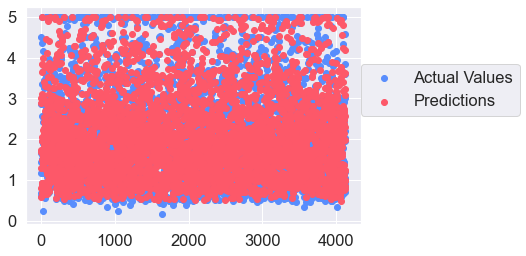

In [103]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c="#588dfd", label="Actual Values")
ax.scatter(x, df["predictions"], c="#fd5869", label="Predictions")
ax.legend(loc=(1, 0.5));

Depending what problem you're working on, having a difference like we do now, might be okay. On the flip side, it may also not be okay, meaning the predictions would have to be closer.

#### Mean Squared Error (MSE)

We can also calculate the MSE using Scikit-Learn's [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function:

In [104]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2572168897374702

Because MSE takes the square of the errors rather than just taking the absolute difference into account, MSE will often be higher than MAE.

To summarize, here are a few rules of thumb for choosing evaluation metrics for regression models:

- R<sup>2</sup> is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R<sup>2</sup> value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
- MAE gives a better indication of how far off each of your model's predictions are on average.
- As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
    - Pay more attention to MAE: When being $10,000 off is _**twice**_ as bad as being $5,000 off.
    - Pay more attention to MSE: When being $10,000 off is _**more than twice**_ as bad as being $5,000 off.

These are only a hadful of potential metrics you can use to evaluate regression models. For a more complete list, refer to the [Scikit-Learn metrics and scoring documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

You can also check out these resources for more information:

- [Beyond Accuracy: Precision and Recall by Will Koehrsen](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)
- [StackOverflow answer describing MSE (mean squared error) and RSME (root mean squared error)](https://stackoverflow.com/a/37861832)

### Finally using the `scoring` parameter

We've covered a lot in this section, but we haven't exactly worked with the `scoring` parameter yet, so now it's finally time to use it to evaluate our machine learning models.

The `scoring` parameter can be used with a function like `cross_val_score()` to tell Scikit-Learn what evaluation metric to return using cross-validation.

As a reference, let's go back to our classification model and the heart disease dataset:

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

Using the default metric aka mean accuracy:

In [106]:
np.random.seed(69)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.8852459 , 0.81967213, 0.83333333, 0.76666667])

As we've seen before, taking the mean of these values gives us the cross-validated accuracy:

In [107]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.49%


Where does the `scoring` parameter fit into all this?

The above result is actually the same as if we use the `scoring` parameter and set it as `"accuracy"`:

In [108]:
np.random.seed(69)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.49%


The beauty of the `scoring` parameter is that we can actually use the other metrics we've discussed earlier and get cross-validated results.

Let's take a look at those:

In [109]:
np.random.seed(69)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


In [110]:
np.random.seed(69)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85


In [111]:
np.random.seed(69)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


For regression models, the workflow is also the same:

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(69)

X = california_df.drop("target", axis=1)
y = california_df["target"]

model = RandomForestRegressor()

The default `scoring` parameter for regression models is `"r2"`:

In [113]:
np.random.seed(69)
cv_r2 = cross_val_score(model, X, y, cv=5)
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.65


In [114]:
np.random.seed(69)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.65


We can also get the corss-validated MAE and MSE scores using the `scoring` parameter, however, there's a slight difference as to how they are called.

The Scikit-Learn documentation states:

> ["All scorer objects follow the convention that higher return values are better than lower return values."](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

Thus, we call MAE as `"neg_mean_absolute_error"` and MSE as `"neg_mean_squared_error"`.

In [115]:
np.random.seed(69)
cv_mae = cross_val_score(model,
                         X,
                         y,
                         cv=5,
                         scoring="neg_mean_absolute_error")

print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

The cross-validated MAE score is: -0.47


In [116]:
np.random.seed(69)
cv_mse = cross_val_score(model, 
                         X, 
                         y, 
                         cv=5,
                         scoring="neg_mean_squared_error")

print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -0.43


### Using different evaluation metrics with Scikit-Learn

Remember the third way of evaluating Scikit-Learn functions?

> 3. Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

We've actually covered these a bit in the earlier parts of this section.

Essentially, all the evaluation metrics we've used so far each have their own corresponding function provided by Scikit-Learn.

They all work by comparing an array of predictions, usually called `y_preds` to an array of actual labels, usually called `y_test` or `y_true`.

For classification models:

- **Accuracy:** use [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- **Precision:** use [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- **Recall:** use [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- **F1:** use [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics for the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics for the test set:
Accuracy: 85.25%
Precision: 0.87
Recall: 0.84
F1: 0.86


For regression models:

- **R<sup>2</sup>:** use [`r2_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- **MAE (mean absolute error):** use [`mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
- **MSE (mean squared error):** use [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [118]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(69)

X = california_df.drop("target", axis=1)
y = california_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.26


Phew! We've covered a lot in this section, but it's all worth it. Evaluating a model's predictions is paramaount in any machine learning project.

There's nothing worse than training a machine learning model and optimizing for the wrong evaluation metric.

Keep in mind the different metrics and evaluation methods we've covered in this section when training your future models.

For more information, you can always refer to the [Scikit-Learn documentation for evaluation metrics](https://scikit-learn.org/stable/modules/model_evaluation.html).

## Improving the model

The first predictions you make with a model are generally referred to as baseline predictions. Conversely, the first evaluation metrics you get are referred to as baseline metrics.

The next step is to improve upon these baseline metrics.

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

From a data perspective asks:

- Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
- Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

From a model perspective asks:

- Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
- Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?

> **Note:** Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a user (you) can adjust.

Since we are working with two datasets, Why not approach this step from a model perspective.

More specifically, we'll look at how we could improve our `RandomForestClassifier` and `RandomForestRegressor` models through hyperparameter tuning.

What are hyperparameters, you might ask?

Let's instantiate a default `RandomForestClassifier` as an example:

In [119]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

Instantiating a model like we did above means we're using the default hyperparameters.

You can take a look at these hyperparameters using the `get_params()` method:

In [120]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Each of these `n_estimators`, `max_depth`, `min_samples_split` values are called _hyperparameters_. You can adjust these values as needed when you instantiate a model.

You can think of hyperparameters as being similar to dials on an oven. On the default setting your oven might do an okay job cooking your favourite meal. But with a little experimentation, you find it does better when you adjust the settings.

![](./img/sklearn-hyperparameter-tuning-oven.png)

The same goes for imporving a machine learning model by hyperparameter tuning. The default hyperparameters on a machine learning model may find patterns in data well. But there's a chance a adjusting the hyperparameters may improve a models performance.

Every machine learning model will have different hyperparameters you can tune.

The sheer amount of these hyperparameters might seem daunting, but don't worry.

For now we can focus on Random Forest models and see how tuning their hyperparameters can change the resulting metrics. From there, we can apply the same principles into other types of models as needed.

Adjusting hyperparameters is usually an experimental process to figure out which are best. As there's no real way of knowing which hyperparameters will be best when starting out.

To get familar with hyparameter tuning, we'll take our `RandomForestClassifier` and adjust its hyperparameters in 3 ways:

1. By hand
2. Randomly with [RandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
3. Exhaustively with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Tuning hyperparameters by hand

So far, we've been using `train_test_split` to split our datasets into two parts: The training set and the test set.

The process thus far is also fairly straightforward: The model gets fitted using the training set then it gets evaluated using the test set.

With hyperparameter tuning, we introduce a third set for the split, a _validation set_.

The model would still get fitted on the training set and evaluated with the test set, but now we use the validation set to (try to) improve the results by adjusting the hyperparameters.

If our starting dataset contained 100 different patient records labels indicating who had heart disease and who didn't and we wanted to build a machine learning model to predict who had heart disease and who didn't, it might look like this:

![Diagram illustrating the allocation for training/test/validation sets](./img/sklearn-train-valid-test-annotated.png)

For starters, [the Scikit-Learn User Guide on Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters) suggests changing the `n_estimators` hyperparameter. As the name suggests, the `n_estimators` hyperparameter is the number of estimators that the model uses (or the number of "trees" in the forest).

While we're at it, let's also try tuning these hyperparameters as well:

- `min_samples_split`: The minimum number of samples required to split an internal node
- `max_features`: The number of features to consider when looking for the best split
- `max_depth`: The maximum depth of the tree
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node

If this still sounds like a lot, the good news is, the process we're taking with the Random Forest and tuning its hyperparameters, can be used for other machine learning models in Scikit-Learn. The only difference is, with a different model, the hyperparameters you tune will be different.

Let's remind ourselves again of the default hyperparameters we've been using so far:

In [121]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Now let's split our data into the train/test/validation sets as illustrated above, with the training set containing 70% of the data and the validation and test sets each containing 15%.

Since we're going to be evaluating a few models, let's also make this into an evaluation function.

In [124]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(69)

# Shuffle the data
heart_disease = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.85
Recall: 0.85
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.85, 'recall': 0.85, 'f1': 0.85}

Beautiful, now let's try and improve the results.

We'll change 1 of the hyperparameters, `n_estimators`, to 200 and see if it improves on the validation set.

In [128]:
np.random.seed(69)

clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 80.00%
Precision: 0.85
Recall: 0.81
F1 score: 0.83


The metric scores seem to actually have gotten worse. Let's maybe try tuning some other hyperparameters.

However, this could take a while if all we're doing is building new models with new hyperparameters each time.

Fortunately, Scikit-Learn also provides helpful functions to help us with hyperparameter tuning.

### Hyperparameter tuning with `RandomizedSearchCV`

Scikit-Learn's [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

Let's see it in action.

First, we create a grid (dictionary) of hyperparameters we'd like to search over:

In [130]:
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

You might wonder where all these values came from.

They're actually made up.

Not completely pulled out of the air but after reading the [Scikit-Learn documentation on Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) you'll see some of these values have certain values which usually perform well and certain hyperparameters take strings rather than integers.

Now we've got the grid setup, Scikit-Learn's RandomizedSearchCV will look at it, pick a random value from each, instantiate a model with those values and test each model.

`RandomizedSearchCV` will then test as many models as there are combinations to be tested:

- `max_depth` has 4 combinations
- `max_features` has 2 combinations
- `min_samples_leaf` has 3 combinations
- `min_samples_split` has 3 combinations
- `n_estimators` has 5 combinations

That's 4x2x3x3x5 = 360 models!

We can also set the `n_iter` parameter to limit the number of models `RandomizedSearchCV` tests.

We will also get cross-validated results (hence the "CV" in `RandomizedSearchCV`) so we can use `train_test_split()`.

And since we're going over so many different models, we'll set n_jobs to -1 of RandomForestClassifier so Scikit-Learn takes advantage of all the cores (processors) on our computers.

> **Note:** Depending on n_iter (how many models you test), the different values in the hyperparameter grid, and the power of your computer, running the cell below may take a while.
> 
> **Note 2:** Setting n_jobs=-1 seems to be breaking on some machines (for [the original notebook](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb) at least, as of 8 December 2019). There seems to be an issue about it, being tracked on GitHub. For the tim ebeing, n_jobs=1 seems to be working.

Let's see it in action.

In [131]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1)

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   4.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=

After RandomizedSearchCV goes through `n_iter` combinations of of hyperparameter search space, it stores the best ones in the attribute `best_params_`:

In [132]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

Now when we call `predict()` on `rs_clf` (our `RandomizedSearchCV` version of our classifier), it'll use the best hyperparameters it found.

In [133]:
rs_y_preds = rs_clf.predict(X_test)

rs_clf_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.73
Recall: 0.96
F1 score: 0.83


Excellent! Thanks to `RandomizedSearchCV` testing out a bunch of different hyperparameters, we get a substantial boost to the recall score while keeping a similarly good score for the other evaluation metrics for our classification model.

### Hyperparameter tuning with `GridSearchCV`

Scikit-Learn's [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) also searches across different hyperparameters to see which work best, but the main difference between `GridSearchCV` and `RandomizedSearchCV` is `GridSearchCV` searches across a grid of hyperparamters exhaustively, whereas `RandomizedSearchCV` searches across a grid of hyperparameters randomly (stopping after `n_iter` combinations).

Going back to the grid of hyperparameters we've been using:

In [134]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

We've calculated that there's a total of 360 different combinations of hyperparameters within this grid.

This could take a long time depending on the power of the computer you're using, the amount of data you have and the complexity of the hyperparamters (usually higher values means a more complex model).

In our case, the data we're using is relatively small (only ~300 samples).

Since we've already tried to find some ideal hyperparameters using `RandomizedSearchCV`, we'll create another hyperparameter grid based on the `best_params_` of `rs_clf`* with less options and then try to use `GridSearchCV` to find a more ideal set.

> **Note:** Based on the `best_params_` of `rs_clf` implies the next set of hyperparameters we'll try are roughly in the same range of the best set found by RandomizedSearchCV.

In [136]:
grid_2 = {"n_estimators": [10, 100, 200],
          "max_depth": [None, 5, 10],
          "max_features": ["auto", "sqrt"],
          "min_samples_split": [2, 4],
          "min_samples_leaf": [2, 4]}

This new grid contains less total combinations of hyperparameters to search over, letting us use `GridSearchCV` to exhaustively search through all possible combintions much more freely.

This time, we're using 3x3x2x2x2 = 72 models in total. Or about 5 times less (360/72) combinations of hyperparameters less than our original grid.

In [137]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(69)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = RandomForestClassifier(n_jobs=-1)

gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   2.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_es

Same as before, the best hyperparameter combination found by `GridSearchCV` can be found using the `best_params_` attribute:

In [138]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

Calling `gs_clf()`'s `predict()` method by default would also use these best hyperparameters:

In [139]:
gs_y_preds = gs_clf.predict(X_test)

gs_clf_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 81.97%
Precision: 0.73
Recall: 0.96
F1 score: 0.83


To summarize what we've learned in this section, let's create a DataFrame to compare the different metrics:

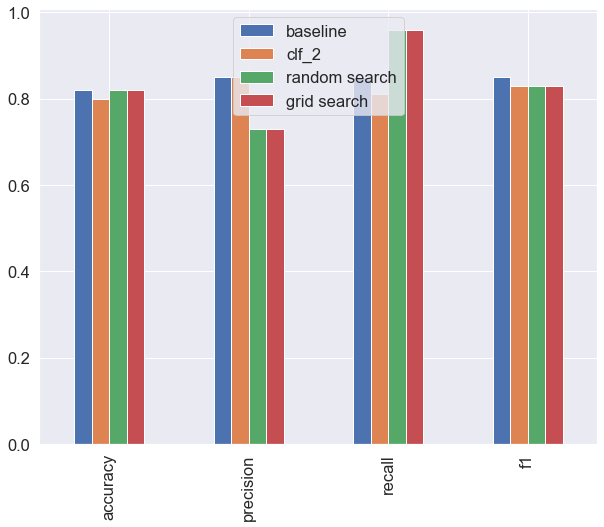

In [141]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_clf_metrics,
                                "grid search": gs_clf_metrics})
compare_metrics.plot.bar(figsize=(10, 8));


It seems, even after trying 72 different combinations of hyperparamters, we don't get much improvement in results.

These things might happen. But it's important to remember, it's not over. There may be more we can do.

In a hyperparameter tuning sense, there may be a better set we could find through more extensive searching with `RandomizedSearchCV` and `GridSearchCV` but it's likely these improvements will be marginal.

A few next ideas you could try:

- **Collecting more data** - Based on the results our models are getting now, it seems like they're finding some patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.
- **Try a more advanced model** - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as XGBoost or CatBoost might perform better.

Since machine learning is part engineering, part science, these kind of experiments are common place in any machine learning project.

## Saving and loading a trained model

Since our `GridSearchCV` model has the best results so far, we'll export it and save it to file.

### Saving and loading a model with `pickle`

One way to save a model is using Python's [`pickle` module](https://docs.python.org/3/library/pickle.html).

Using `pickle`'s `dump()` method, we'll pass our `gs_clf` model along with the `open()` function  containing a string for the filename we want to save our model as, along with the `"wb"` string which stands for "write binary", which is the file type `open()` will write our model as.

In [142]:
import pickle

pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

Once it's saved, we can import it using pickle's `load()` method, passing it `open()` containing the filename as a string and `"rb"` standing for "read binary":

In [143]:
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

Once you've reimported your trained model using `pickle`, you can use it to make predictions as usual.

In [144]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 81.97%
Precision: 0.73
Recall: 0.96
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.73, 'recall': 0.96, 'f1': 0.83}

### Saving and loading a model with `joblib`

Alternatively, we can also save and load our models using [`joblib`](https://joblib.readthedocs.io/en/latest/persistence.html).

To save a model, we can use `joblib`'s `dump()` function, passing it the model (`gs_clf`) and the desired filename:

In [146]:
from joblib import dump, load

dump(gs_clf, filename="gs_random_forest_model_1.joblib");

Once you've saved a model using `dump()`, you can import it using `load()` and passing it the filename of the model.

In [147]:
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

Again, once imported, we can make predictions with our model:

In [148]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 81.97%
Precision: 0.73
Recall: 0.96
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.73, 'recall': 0.96, 'f1': 0.83}

You'll notice the evaluation metrics are the same as before.

Which one should you use, `pickle` or `joblib`?

According to [Scikit-Learn's documentation](https://scikit-learn.org/stable/modules/model_persistence.html), they suggest it may be more efficient to use `joblib` as it's more efficient with large numpy arrays (which is what may be contained in trained/fitted Scikit-Learn models).

Either way, they both function fairly similar so deciding on which one to use, shouldn't cause too much of an issue.